In [142]:
import perceval as pcvl
import perceval.components as comp
import numpy as np
from perceval.components import Circuit
import math

In [145]:
T1 = 1/(1+2**(1/3))
R1 = np.sqrt(1-T1**2)
T3 = T1**2
R3 = np.sqrt(1-T3**2)
theta1 = 2*math.pi*54.74/180
theta2 = 2*math.pi*17.63/180

In [159]:
last_modes_cz = (Circuit(4)
                         .add(0, pcvl.PS(math.pi), x_grid=0)
                         .add(3, pcvl.PS(math.pi), x_grid=0)
                         .add((1, 2), pcvl.PERM([1, 0]), x_grid=1)
                         .add((0, 1), pcvl.BS.H(theta=theta1), x_grid=2)
                         .add((2, 3), pcvl.BS.H(theta=theta1), x_grid=2)
                         .add((1, 2), pcvl.PERM([1, 0]))
                         .add((0, 1), pcvl.BS.H(theta=-theta1))
                         .add((2, 3), pcvl.BS.H(theta=theta2)))

circ = (Circuit(6, name="Heralded CZ")
                .add(1, pcvl.PERM([1, 0]))
                .add(2, last_modes_cz, merge=True)
                .add(1, pcvl.PERM([1, 0])))

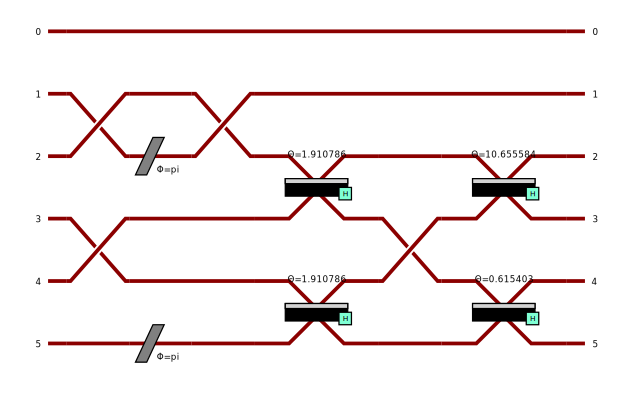

In [160]:
from perceval.rendering.circuit import SymbSkin, PhysSkin
pcvl.pdisplay(circ, skin=PhysSkin())

In [183]:
pt = pcvl.Processor("SLOS",circ)
pt.add_herald(5, 1)

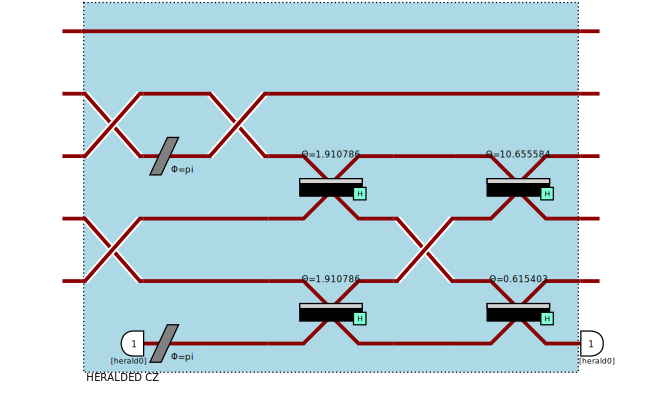

In [184]:
pcvl.pdisplay(pt, recursive = True)

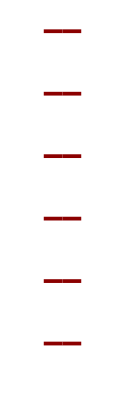

In [137]:
pcvl.pdisplay(ph, recursive = True)

In [222]:
p = pcvl.Processor("SLOS",6)
#Upper Modes 0,2,4
p.add(4,pcvl.BS.H())
p.add([0,1],pcvl.BS.Ry(pcvl.BS.r_to_theta(R1)))
p.add([2,3],pcvl.BS.Ry(pcvl.BS.r_to_theta(R1)))
p.add([4,5],pcvl.BS.Ry(pcvl.BS.r_to_theta(R1)))

p.add([0,1],pcvl.BS.Ry(-pcvl.BS.r_to_theta(R3)))
p.add([2,3],pcvl.BS.Ry(-pcvl.BS.r_to_theta(R3)))
p.add([4,5],pcvl.BS.Ry(-pcvl.BS.r_to_theta(R3)))

p.add([1,2],pcvl.BS.Ry(pcvl.BS.r_to_theta(R1)))
p.add([3,4],pcvl.BS.Ry(pcvl.BS.r_to_theta(R1)))
p.add([5],pcvl.PS(np.pi))
p.add([0,5],pcvl.BS.Ry(pcvl.BS.r_to_theta(R1)))
p.add([1,2,3,4,5],pcvl.PERM([4,0,1,2,3]))
p.add([5],pcvl.PS(np.pi))
p.add(4,pcvl.BS.H())

p.set_postselection(pcvl.PostSelect("[0,1]==1 & [2,3]==1 & [4,5]==1"))

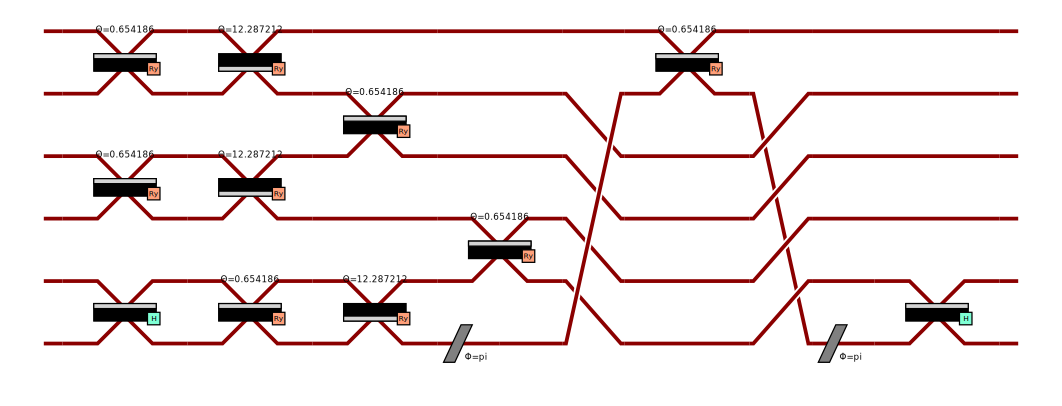

In [223]:
pcvl.pdisplay(p, recursive = True)

In [224]:
mapping = {pcvl.BasicState('|1,0,1,0,1,0>'): '000',
               pcvl.BasicState('|1,0,1,0,0,1>'): '001',
               pcvl.BasicState('|1,0,0,1,1,0>'): '010',
               pcvl.BasicState('|1,0,0,1,0,1>'): '011',
               pcvl.BasicState('|0,1,1,0,1,0>'): '100',
               pcvl.BasicState('|0,1,1,0,0,1>'): '101',
               pcvl.BasicState('|0,1,0,1,1,0>'): '110',
               pcvl.BasicState('|0,1,0,1,0,1>'): '111'}

target = {"000": "000", "001": "001", "010": "010", "011": "011",
              "100": "100", "101": "101", "110": "111", "111": "110"}

ca = pcvl.algorithm.Analyzer(p, mapping)

ca.compute(expected=target)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,000,001,010,011,100,101,110,111
000,0.922226,0.015386,0.029907,0.001077,0.029907,0.001077,0.000363131,5.67225e-05
001,0.054227,0.885319,0.000989778,0.027492,0.000989778,0.027492,0.000347131,0.003143
010,0.033797,0.00085537,0.890988,0.032078,0.001155,4.15778e-05,0.03848,0.002606
011,0.002606,0.03848,0.032078,0.890988,4.15778e-05,0.001155,0.00085537,0.033797
100,0.033797,0.00085537,0.001155,4.15778e-05,0.890988,0.032078,0.03848,0.002606
101,0.002606,0.03848,4.15778e-05,0.001155,0.032078,0.890988,0.00085537,0.033797
110,0.003143,0.000347131,0.027492,0.000989778,0.027492,0.000989778,0.885319,0.054227
111,5.67225e-05,0.000363131,0.001077,0.029907,0.001077,0.029907,0.015386,0.922226


performance = 0.5699930981312695, fidelity = 0.680138732743562


In [8]:
cnot = pcvl.catalog["heralded cz"].build_processor()

In [9]:
ptry = pcvl.Processor("SLOS",6)
ptry.add(0,cnot)

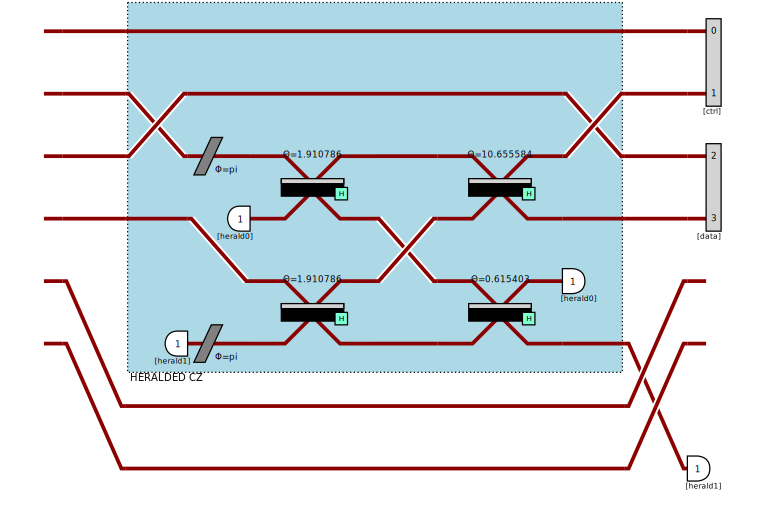

In [10]:
pcvl.pdisplay(ptry, recursive = True)